# Taxi Q-learning

In [1]:
import numpy as np
import gym
import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from IPython.display import clear_output
from time import sleep

### Actions,  states and rewards

#### actions:
- 0: south
- 1: north
- 2: east
- 3: west
- 4: pick-up
- 5: drop-off

#### states:

5x5 grid with 4 destinations and 5 passenger locations (4 pickup points + 1 when passenger is in the taxi). Then 5x5x4x5 = 500 possible states

#### rewards:

- Successful dropoff = +20
- Illegal pick-up = -10
- Illegal dro-poff = -10
- Other action = -1

In [3]:
env = gym.make('Taxi-v3')
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
env.reset()

# Random actions (20 steps)
for step_index in range(21):
    # Clear previous render
    clear_output(wait=True)
    # Take random action
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # Display step parameters
    print("Step {}:".format(step_index))
    print("action: {}".format(action))
    print("observation: {}".format(observation))
    print("reward: {}".format(reward))
    print("done: {}".format(done))
    print("info: {}".format(info))
    # Wait before new action
    sleep(0.5)
    if done:
        break

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 20:
action: 3
observation: 52
reward: -1
done: False
info: {'prob': 1.0}


## Q-learning

In [5]:
action_size = env.action_space.n
state_size = env.observation_space.n
print("Number of actions: {}".format(action_size))
print("Number of states: {}".format(state_size))

Number of actions: 6
Number of states: 500


In [6]:
# Initialize Q table
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [7]:
total_episodes = 1000
max_steps = 99

alpha = 0.7 # learning rate
gamma = 0.9 # discount rate

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01 # used to reduce epsilon

training episode 100
training episode 200
training episode 300
training episode 400
training episode 500
training episode 600
training episode 700
training episode 800
training episode 900
training episode 1000


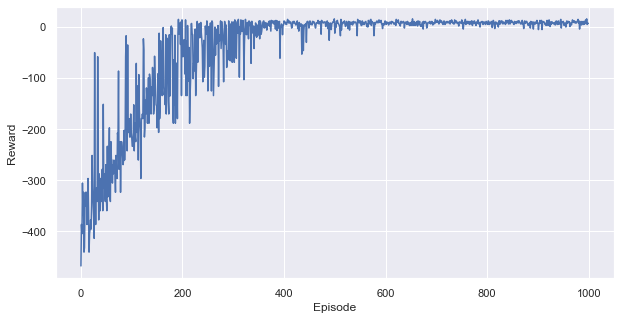

In [8]:
rewards = []

for episode in range(total_episodes):
    # Reset environment at each new episode
    state = env.reset()
    step = 0
    total_rewards = 0 # just to save progress of learning
    
    for step in range(max_steps):
        
        # Select action according to exploration/exploitation trade-off
        if random.uniform(0,1) > epsilon:
            # exploitation : select action with biggest Q value for this state
            action = np.argmax(qtable[state, :])
        else:
            # exploration: random action choice
            action = env.action_space.sample()
        
        # Do action (a) and observe the outcome state (s') and reward (R)
        new_state, reward, done, info = env.step(action)
        
        # Increment total reward
        total_rewards += reward
    
        '''
        Update q value for the state based on the Bellman equation
        Q(s,a) = Q(s,a) + alpha*[R(s,a) + gamma*max(Q(s',a') - Q(s,a))]
        '''
        qtable[state, action] = qtable[state, action] + \
            alpha * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        # Increment state
        state = new_state
        
        if done is True:
            break
    
    # Increment episode
    episode += 1
    
    # Save reward of each step
    rewards.append(total_rewards) 
    
    # Reduce epsilon to reduce the number of exploration for next episodes
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    
    # Display progree each batch of episodes
    if episode%100 == 0:
        print('training episode',episode)
        
# Plot learning graph
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward');

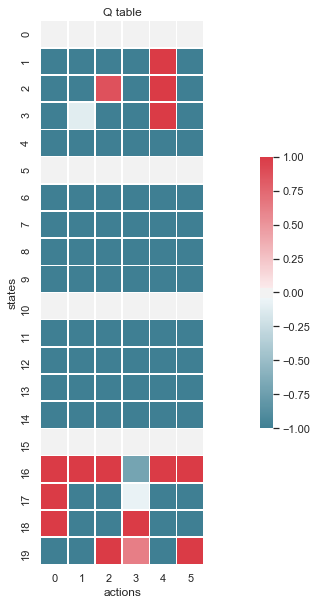

In [9]:
# Q table for 20 first steps
fig, ax = plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    qtable[:20], 
    cmap=cmap, 
    vmax=1.0, 
    vmin=-1.0, 
    center=0, 
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
)
plt.title('Q table')
plt.xlabel('actions')
plt.ylabel('states');

In [10]:
# Test agent
state = env.reset()
step = 0
done = False
total_rewards = 0

for step in range(max_steps):
    clear_output(wait=True)
    env.render()
    
    action = np.argmax(qtable[state, :])
    new_state, reward, done, info = env.step(action)
    total_rewards += reward
    
    sleep(1)
    
    if done is True:
        clear_output(wait=True)
        env.render()
        print("Score: ", total_rewards)
        break
        
    state = new_state
    
env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Score:  6
